In [10]:
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import pandas as pd
from PIL import Image
import seaborn as sns
from pyecharts import TreeMap

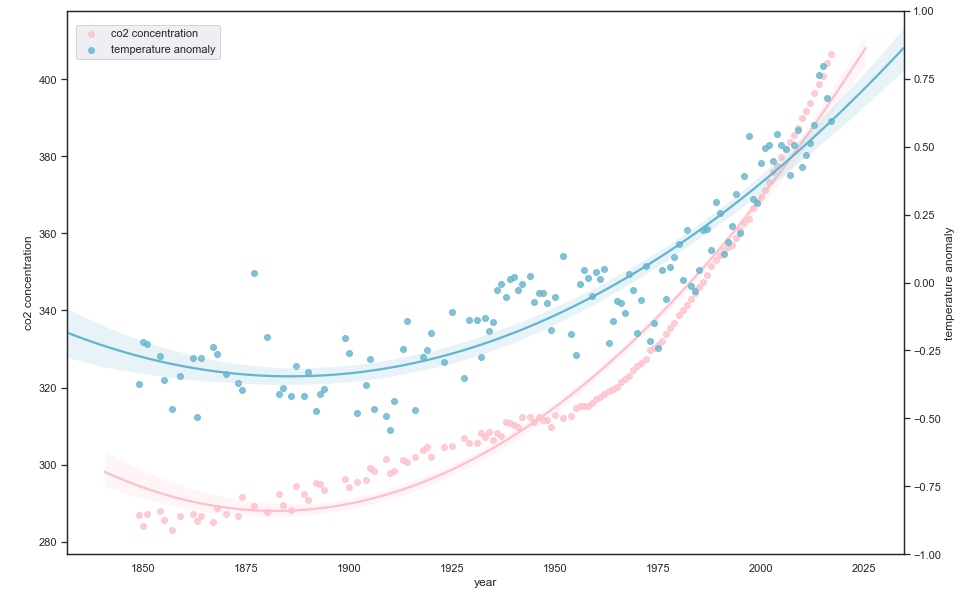

In [11]:
df=pd.read_csv("co2concentration-temperature.csv")

sns.set(style="white")
fig, ax=plt.subplots()
fig.set_size_inches(15, 10)
ax2=ax.twinx()
sns.set(color_codes=True)
cmap = sns.cubehelix_palette(dark=.0, light=.8, as_cmap=True)
sns.regplot(x="year", y="co2 concentration", data=df, ax=ax, order=2, color="pink", marker="o", label="co2 concentration")
sns.regplot(x="year", y="temperature anomaly", data=df, ax=ax2, order=2, color="c", marker="o", label="temperature anomaly")
fig.legend(loc=2, bbox_to_anchor=(0.065, 0.8))
a=ax2.set_ylim(-1,1)

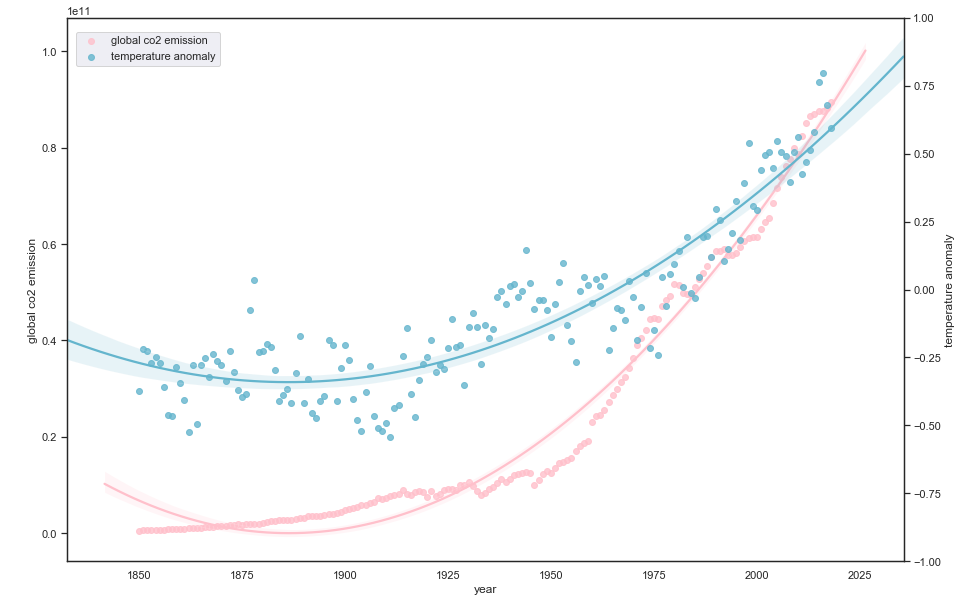

In [12]:
df2=pd.read_csv("co2emission-temperature.csv")

sns.set(style="white")
fig, ax=plt.subplots()
fig.set_size_inches(15, 10)
ax2=ax.twinx()
sns.set(color_codes=True)
cmap = sns.cubehelix_palette(dark=.0, light=.8, as_cmap=True)
sns.regplot(x="year", y="global co2 emission", data=df2, ax=ax, order=2, color="pink", marker="o", label="global co2 emission")
sns.regplot(x="year", y="temperature anomaly", data=df2, ax=ax2, order=2, color="c", marker="o", label="temperature anomaly")
fig.legend(loc=2, bbox_to_anchor=(0.065, 0.8))
a=ax2.set_ylim(-1,1)

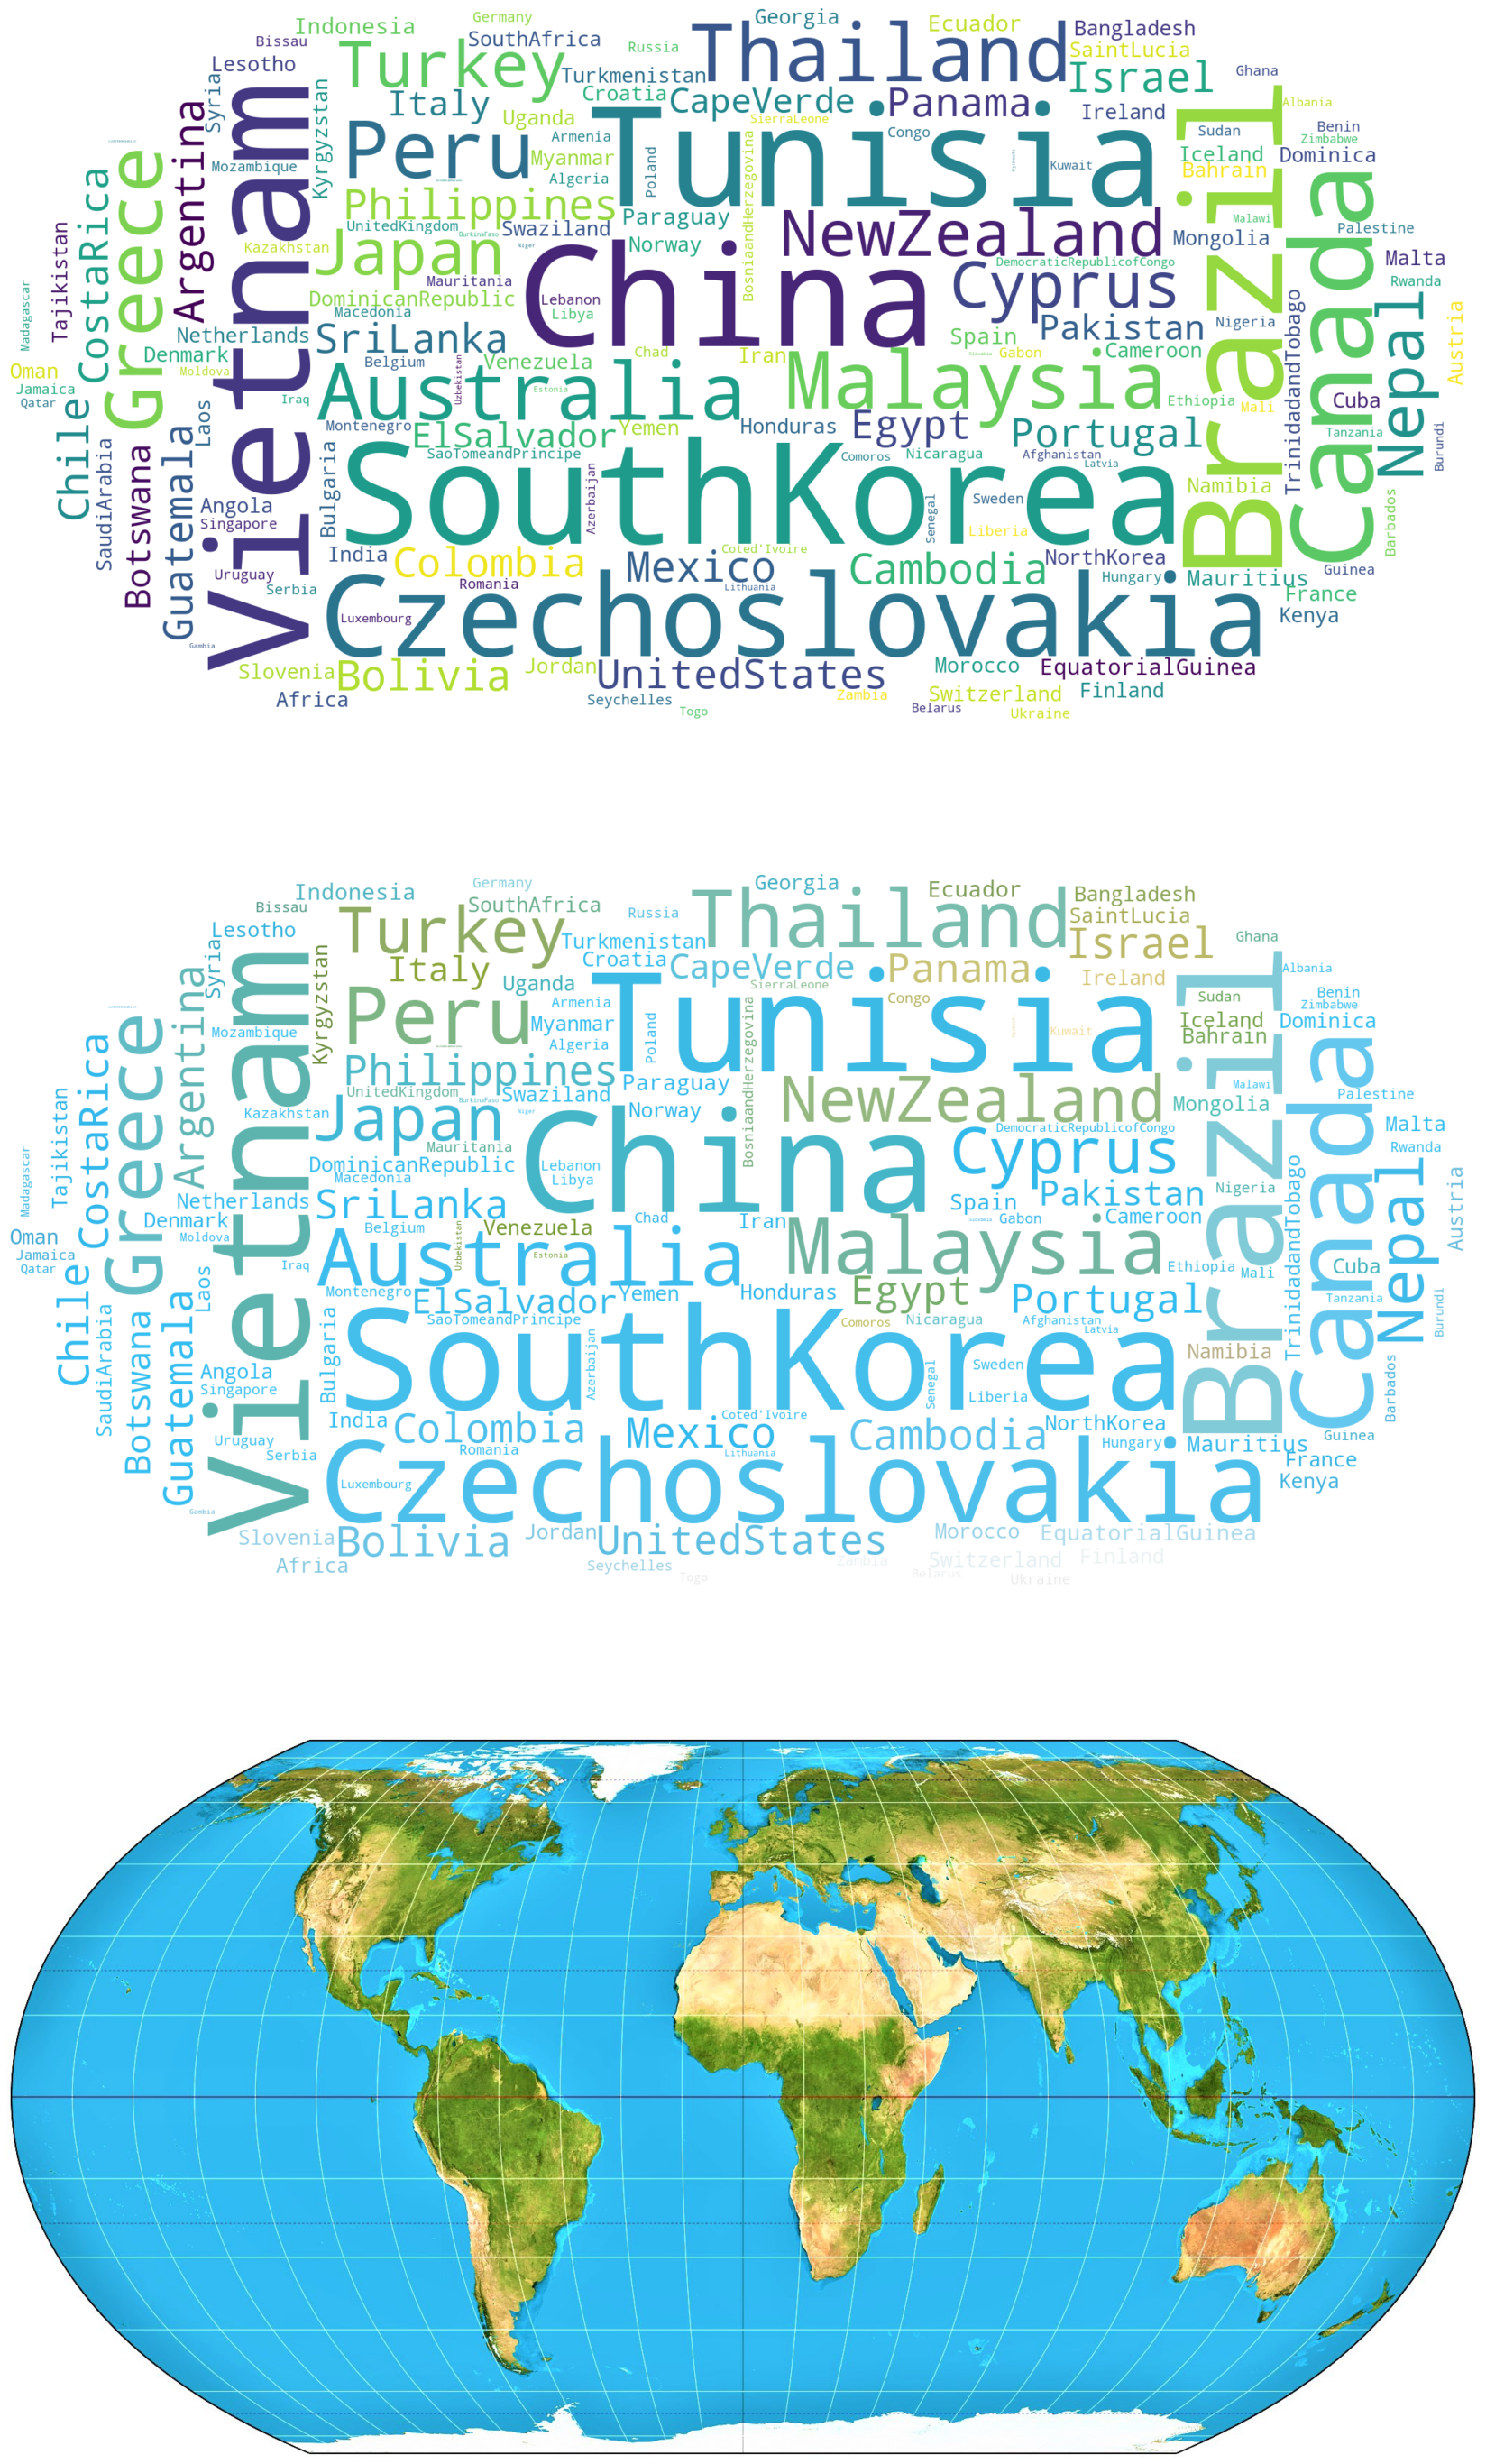

In [13]:
f=open("wordcloud.txt").read()

earthfig=np.array(Image.open("Equal_Earth_projection_SW2.jpg"))
stopwords = set(STOPWORDS)
stopwords.add("said")
wordcloud = WordCloud(background_color="white", mask=earthfig, stopwords=stopwords, collocations=False).generate(f)
fig, axes = plt.subplots(3, 1)
fig.set_size_inches(55, 50)
axes[0].imshow(wordcloud, interpolation="bilinear")
image_colors = ImageColorGenerator(earthfig)
axes[1].imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
axes[2].imshow(earthfig, cmap=plt.cm.gray, interpolation="bilinear")
for ax in axes:
    ax.set_axis_off()
plt.show()


In [14]:
f=open("tree.txt",'r')
a=f.read()
tree=eval(a)
f.close()

counter=0
for i in range(len(tree)):
    counter+=tree[i]["value"]

for i in range(len(tree)):
    tree[i]["value"]=tree[i]["value"]/counter

# change the ratio from region to global
for i in tree:
    for j in i["children"]:
        j["value"]=j["value"]*i["value"]
bcounter=round(counter/pow(10,9))
def label(params):
    return params.name+"\n"+window.parseFloat(params.value*100).toFixed(2)+r"%"+" "+"co2 emission" 

treemap=TreeMap(width=800, height=800, title_text_size=24, is_animation=True, renderer="canvas")
treemap.add("Co2 emission in 10 years", tree, is_random=False, is_legend_show=True
           , line_opacity=0.5
           , is_label_show=True
           , label_pos="inside"
           , legend_orient="vertical"
           , label_formatter=label
           , is_more_utils=True
           , label_text_size =24)
treemap.render()